### 머신러닝 모델 평가
* 일반적으로 머신러닝은
    + 데이터가공/변환(전처리)
    + 모델 학습/예측
    + 평가의 과정을 거침
* 앞의 타이타닉 분석에서 모델의 평가는 정확도만 사용함
* 한편, 머신러닝의 예측성능의 평가방법은
    + 회귀 : R^2, MSE평균제곱오차
    + 분류 : 오차행렬, 정밀도ROC, AUC, F1스코어, 크로스엔트로피, 최대우도

### 정확도의 함정
* 탐색적 분석 시행시 성별 기준 생존비율은 여성이 더 높음
* 따라서, 굳이 ML알고리즘을 적용하지 않아도 성별이 여성일 경우 생존, 남성일 경우 사망이라고 예측해도 크게 무리가 없음
* 즉, 단순히 성별 조건 하나만 적용해도 별거 아닌 알고리즘으로도 높은 정확도가 나타나는 상황 발생

In [51]:
# BaseEstimator 클래스를 상속받아 가짜분류기 생성
from sklearn.base import BaseEstimator

In [52]:
class DummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        pass
    
    # 성별이 1 (남자) 이면 사망(0)
    # 성별이 0 (여자) 이면 생존(1) 이라고 
    # 예측하는 predict메서드 정의
    def predict(self, X):
        # 입력데이터 크기만큼 0으로 채워진 1차원 행렬 생성
        pred = np.zeros((X.shape[0],1))
        
        for i in range(X.shape[0]):
            # 성별이 여성이면 무조건 생존이라 예측
            if X['sex'].iloc[i] != 1:
                pred[i] = 1
                
        return pred

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [54]:
titanic = pd.read_csv('titanic.csv')

In [55]:
titanic['sex'] = titanic['sex'].apply(lambda x:0 if x == 'female' else 1)

In [56]:
data = titanic.iloc[:, [0,3,4,5.6,8]]
target = titanic.survived

In [57]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, train_size=0.7, random_state=2111041205)

In [58]:
myclf = DummyClassifier()
myclf.fit(Xtrain, ytrain)
pred = myclf.predict(Xtest)
accuracy_score(pred, ytest)

0.798469387755102

* 따라서 불균형한 레이블 데이터셋트의 성능수치로 정확도를 평가지표로 사용해서는 안됨
    + 이러한 한계를 극복하기 위해 오차행렬을 사용
    + 특히 분류모델에서 정확도보다 정밀도 /재현율을 더 선호

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [60]:
confusion_matrix(pred, ytest)

array([[202,  36],
       [ 43, 111]])

In [61]:
print(classification_report(pred, ytest))

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84       238
         1.0       0.76      0.72      0.74       154

    accuracy                           0.80       392
   macro avg       0.79      0.78      0.79       392
weighted avg       0.80      0.80      0.80       392



In [62]:
# iris 데이터셋을 이용해서 로지스틱 회귀모델로 분석한후 오차행렬과 정밀도/재현율등을 확인해보세요

In [63]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [64]:
iris = load_iris()

In [65]:
Xtrain, Xtest, ytrain, ytest = train_test_split(iris.data, iris.target, train_size=0.7, stratify=iris.target, random_state=2111041255)

In [66]:
lrclf = LogisticRegression()
lrclf.fit(Xtrain, ytrain)
pred = lrclf.predict(Xtest)
accuracy_score(pred, ytest)

0.9777777777777777

In [67]:
print(classification_report(pred, ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [68]:
confusion_matrix(pred, ytest)

array([[15,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 15]])

# TP, TN, FP, FN
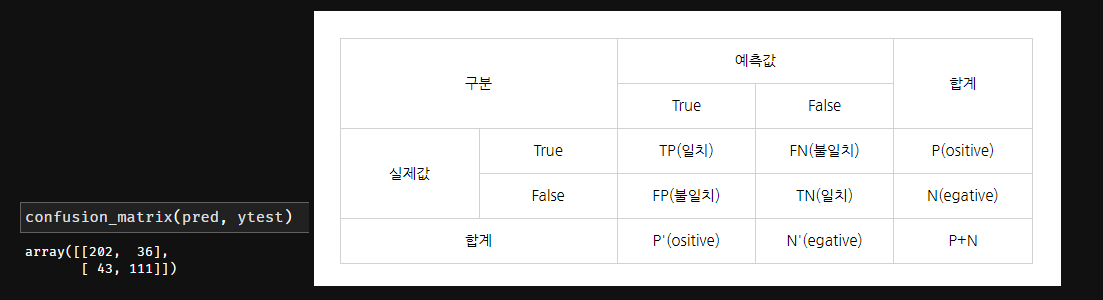

### 정확도
* 맞는 것을 맞다고, 틀린것을 틀리다고 올바르게 예측한 것
##  $ accuacy = \frac {TP + TN} {TP + TN + FP + FN } $
* 오차행렬에서 대각선 방향

In [69]:
# 타이타닉 분석결과의 오차행렬에서 정확도 계산
(202 + 111) / (202 + 36 + 43 + 111)

0.798469387755102

### 정밀도
* 모델의 예측값이 얼마나 올바른지 알아보는 지표
* 양성으로 예측한 것 중에서 실제로 양성인 것은 얼마나 존재하나?
# 이 수치가 높을수록 모델의 성능이 좋다는 의미
## $ precision = \frac {TP} {Tp + FP}$

In [70]:
# 타이타닉 분석결과의 오차행렬에서 정밀도 계산 
(202) / (202 + 43)

0.8244897959183674

### 재현율
* 양성 중 양성이라고 예측한 것의 비율
* 즉, 실제로 양성인 것을 얼마나 예측했는지 알아봄
* 다른 말로는 민감도 또는 적중률(hit rate) 이라고도 함
## $ recall = \frac {TP} {TP + FN} $

In [71]:
# 타이타닉 분석결과의 오차행렬에서 재현율 계산
(202) / (202 + 36)

0.8487394957983193

### 정밀도/재현율의 trade-off
* 분류하는 업무의 특성상 정밀도 또는 재현율이 특별히 강조되어야 하는 경우(특히 임상의료)
* 결정 임계값을 조정하면 정미도 또는 재현율을 높일 수 있음
    + 즉, 이진분류에서 0 또는 1로 판정할 기준값을 의미
    + 임계값을 0.5로 정하는 경우 기준값보다 확률이 크면 posotive, 작으면 negative로 결정
* 한편, 정밀도와 재현율은 상호보완적인 지표이기 때문에, 어느 한쪽을 올리면 다른 한쪽은 떨어지는 관계가 됨

### F1 스코어
* 정밀도와 재현율은 분류모델의 성능을 평가하는데 중요한 지표
* 따라서, 이것들을 하나의 수치로 정리해서 나타낸 지표 - 조화평균
* 데이터의 레이블이 불균형 구조일때 모델의 성늘을 정확하게 평가하기 위한 지표
* 어느 한쪽으로 치우치지 않는 수치를 나타날때 상대적으로 높은 값을 가짐
* 예를 들어, 예측모델 A의 정밀도와 재현율이 0.9/0.1이고, 예측모델 B의 정미도와 재현율이 0.55/0.45 일때 각각의 F1스코어는 0.18/0.495이다
    + 따라서, 모델 B가 모델 A보다 우수하다
## $ F1-score = \frac  {Precision * recall} {Precision + recall} $

In [72]:
# 6마리의 동물형상 중 개p/고양이n를 맞추는 게임을 진행
# 정답 = [개     개     개 고양이 개     고양이]
# 예측 = [개     고양이 개 고양이 개     개    ]

In [73]:
# # 오차행렬은
#                 p    n (predict)
# (actua1)    p   3    2
#             n   1    1

In [74]:
# # 정확도는
# 4 / 6 = 0.66 # (개를 개라고, 고양이를 고양이라고 예측) pp + pn = 4 ,  총6마리 나누기 4 
# # 정밀도는
# 3 / 4 = 0.75 # (개라고 예측한 것 중에서 개인비율) 개라고 예측 = 4  개라고 맞춘횟수 = 3 
# # 재현율은
# 3 / 4 = 0.75 # (실제 개중에서 내가 개라고 예측한 것)

In [75]:
# 178개의 와인샘플을 13개의 여러 화학적 성분에 근거해 3가지 등급으로 분류한 wine 데이터셋을 이용해서 
# logistic regression,으로 분석하고 오차행렬과 정밀도/재현율, F1스코어 등을 확인해보세요

In [76]:
from sklearn.datasets import load_wine

In [77]:
wine = load_wine()

In [78]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [79]:
wine.data[:5]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

In [80]:
wine.feature_names # 컬럼명

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [81]:
wine.target_names # 종속변수값

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [82]:
wines = pd.Series(wine.target).value_counts() # 종속변수값 분포

In [83]:
# wine 데이터셋을 dataframe으로 생성
wines = pd.DataFrame(wine.data)
wines.colums = wine.feature_names
wines['class'] = wine.target
wines.head()

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3,4,5,6,7,8,9,10,11,12,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [84]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
 13  class   178 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 19.6 KB


In [85]:
# 데이터들을 train/test 로 나눔
Xtrain, Xtest, ytrain, ytest = train_test_split(wine.data, wine.target, train_size=0.7, stratify=wine.target, random_state=2111041645)

In [86]:
# max_iter : 적절한 해를 찾기위한 반복횟수 지정
lrclf = LogisticRegression(max_iter=2500)
lrclf.fit(Xtrain, ytrain)
pred = lrclf.predict(Xtest)
accuracy_score(pred, ytest)

0.9444444444444444

In [87]:
confusion_matrix(pred, ytest)

array([[17,  0,  0],
       [ 1, 20,  1],
       [ 0,  1, 14]])

In [88]:
print(classification_report(pred, ytest))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       0.95      0.91      0.93        22
           2       0.93      0.93      0.93        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.94      0.94      0.94        54



In [89]:
# 랜덤 포레스트를 이용한 분석
from sklearn.ensemble import RandomForestClassifier

In [90]:
rfclf = RandomForestClassifier()
rfclf.fit(Xtrain, ytrain)
pred = rfclf.predict(Xtest)
accuracy_score(ytest, pred)

0.9444444444444444

### 적절한 변수선택을 통한 분석 방법 
* SequentialFeatureSelectior 를 이용해서 적절한 변수는 몇개이고 그때의 정확도는 얼마인지 알아볼 수 있음

In [91]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

In [92]:
scores = []

In [93]:
# lrclf = LogisticRegression(max_iter=10000)
# for n in range(1,13):
#     sfs = SequentialFeatureSelector(lrclf, n_features_to_select=n, n_jobs=-1)
#     sfs.fit(Xtrain, ytrain)
    
#     mask = sfs.support_
#     lrclf.fit(Xtrain[:, mask], ytrain)
#     scores.append(lrclf.score(Xtrain[:,mask],ytrain))

In [94]:
knn = KNeighborsClassifier()
for n in range(1,13):
    sfs = SequentialFeatureSelector(knn, n_features_to_select=n, n_jobs=-1)
    sfs.fit(Xtrain, ytrain)
    
    mask = sfs.support_
    knn.fit(Xtrain[:, mask], ytrain)
    scores.append(knn.score(Xtrain[:,mask],ytrain))

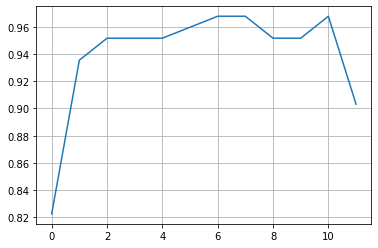

In [96]:
import matplotlib.pyplot as plt
plt.plot(scores)
plt.grid()

In [102]:
# 종속변수가 6~7일때 정확도가 좋음
sfs = SequentialFeatureSelector(knn, n_features_to_select=6, n_jobs=-1)
sfs.fit(Xtrain, ytrain)
mask = sfs.support_
knn.fit(Xtrain[:, mask], ytrain)
knn.score(Xtrain[:,mask],ytrain)

0.9596774193548387

In [103]:
# 최적의 정확도 출력시 컬럼들
wines.columns[1:][mask] #

Index([3, 6, 7, 8, 9, 10], dtype='object')